In [1]:
from math import pi, pow, sqrt, atan
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.misc import imsave
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from utils import *

## Settings

In [59]:
path = 'z:\\tomo\\ershov\\metal_flow\\'
inputPath   = path + 'X_AlSi9Mg0.6_20SiC(60)_1500ppmO2_QF\\proc\\'
compPath    = path + 'X_AlSi9Mg0.6_20SiC(60)_1500ppmO2_QF\\flow_comp2\\'
outputPath  = path + 'X_AlSi9Mg0.6_20SiC(60)_1500ppmO2_QF\\'
resultsPath = path + 'X_AlSi9Mg0.6_20SiC(60)_1500ppmO2_QF\\'

dataset = "exp_60"

num_frames = 1400

frame_rate = 1.0 / 50.0 # 50 frames per second
pixel_size = 2.7

vel_factor = pixel_size / frame_rate 

#---------------------------
#   Visuals
#---------------------------

blue = (57 / 255.0, 106 / 255.0, 177 / 255.0)
red = (204/ 255.0, 37/ 255.0, 41/ 255.0 )
green = (62/ 255.0, 150/ 255.0, 81/ 255.0 )  
grey = (128/ 255.0, 133/ 255.0, 133/ 255.0 )
gold = (237/ 255.0, 218/ 255.0, 116/ 255.0 )
darkgrey = (0.663, 0.663, 0.663)

line_width = 2.0

# Allow LaTeX
#plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
#plt.rc('font', size=16)

#---------------------------
#   Fonts
#---------------------------

title_font_size = 20
label_font_size = 20
ticks_font_size = 16

plt.rc('xtick', labelsize=ticks_font_size) 
plt.rc('ytick', labelsize=ticks_font_size)


## Collect Results

In [3]:
summary_results = []
all_data = []


for i in range(0, num_frames):

    frame = str(i).zfill(4)

    data_p = np.loadtxt(inputPath + frame + "_res_stat.txt", skiprows = 1)
    data_x = np.loadtxt(compPath + frame + "_flow_comp_x_stat.txt", skiprows = 1)
    data_y = np.loadtxt(compPath + frame + "_flow_comp_y_stat.txt", skiprows = 1)

    indexArea = 1
    indexMean = 2
    indexStd = 3
    indexMax = 5

    i_area = data_p[:,indexArea]

    # Velocity stats
    i_mean_velocity = np.around(data_p[:,indexMean], decimals=2)   
    i_std_velocity = np.around(data_p[:,indexStd], decimals=2)
    i_max_velocity = np.around(data_p[:,indexMax], decimals=2)

    # Flow components stats
    i_x_mean_velocity = np.around(data_x[:,2], decimals=2)   
    i_x_std_velocity = np.around(data_x[:,3], decimals=2)
    i_x_max_velocity = np.around(data_x[:,5], decimals=2)

    i_y_mean_velocity = np.around(data_y[:,2], decimals=2)   
    i_y_std_velocity = np.around(data_y[:,3], decimals=2)
    i_y_max_velocity = np.around(data_y[:,5], decimals=2) 


    # Overal statistics for the current time frame
    frame_data = np.array([i_area, i_mean_velocity, i_std_velocity, i_max_velocity, i_x_mean_velocity, i_y_mean_velocity, i_x_std_velocity, i_y_std_velocity, i_x_max_velocity, i_y_max_velocity]).T

    all_data.append(frame_data)

    #-------------------------------------------------------------
    # Make summary (integrated) results for each time frame
    #-------------------------------------------------------------
    num_clusters = len(data_p)
    total_area = np.sum(data_p[:,indexArea])

    # Velocity stats
    mean_velocity = np.around(np.mean(data_p[:,indexMean]), decimals=2)   
    std_velocity = np.around(np.mean(data_p[:,indexStd]), decimals=2)
    max_velocity = np.around(np.max(data_p[:,indexMax]), decimals=2)

    # Flow components stats
    x_mean_velocity = np.around(np.mean(data_x[:,2]), decimals=2)   
    x_std_velocity = np.around(np.mean(data_x[:,3]), decimals=2)
    x_max_velocity = np.around(np.max(data_x[:,5]), decimals=2)

    y_mean_velocity = np.around(np.mean(data_y[:,2]), decimals=2)   
    y_std_velocity = np.around(np.mean(data_y[:,3]), decimals=2)
    y_max_velocity = np.around(np.max(data_y[:,5]), decimals=2)


    # Flow direction (angle) stats

    num1 = sum([1 for a in data_p[:,indexArea] if (a < 20)])
    num2 = sum([1 for a in data_p[:,indexArea] if (a >= 20 and a < 100)])
    num3 = sum([1 for a in data_p[:,indexArea] if (a >= 100 and a < 500)])
    num4 = sum([1 for a in data_p[:,indexArea] if (a >= 500 and a < 1000)])
    num5 = sum([1 for a in data_p[:,indexArea] if (a >= 1000)])

    #print num1, num2, num3, num4, num5


    outputInfo = False

    if outputInfo == True:

        print( "Time frame", frame)
        print( "Number of clusters", num_clusters)
        print( "Total clusters area", total_area)

        print( "Average velocity", mean_velocity)
        print( "Std velocity", std_velocity)
        print( "Max velocity", max_velocity)
        #print
        #print "Small particles", num_small
        #print "Medium particles", num_medium
        #print "Large particles", num_large

    res = [i, num_clusters, total_area, mean_velocity, std_velocity, max_velocity, x_mean_velocity, y_mean_velocity, x_std_velocity, y_std_velocity, x_max_velocity, y_max_velocity, num1, num2, num3, num4, num5]
    summary_results.append(res)

    #print res    


    # the histogram of the data
    #n, bins, patches = plt.hist(data[:,indexArea], num_bins, facecolor='green', alpha=0.5)


with open(outputPath + dataset + "_results.txt", 'w') as file:
    file.write('\t'.join(str(j) for j in ['n', 'num', 'area', 'avg_vel', 'std_vel', 'max_vel', 'avg_x', 'avg_y', 'std_x', 'std_y', 'max_x', 'max_y', 'num1', 'num2', 'num3', 'num4', 'num5']) + '\n')
    file.writelines('\t'.join(str(j) for j in i) + '\n' for i in summary_results)

#f = open(outputPath + dataset + "_all_data.npy", 'w')
np.save(outputPath + dataset + "_all_data.npy", all_data)
#f.close()

print("Finished!")

KeyboardInterrupt: 

## Make analysis

In [4]:
data = np.load(outputPath + dataset + "_all_data.npy", encoding='bytes')

indexArea = 0
indexAvgVel = 1
indexX = 4
indexY = 5

data_mean_vel = [np.mean(frame[:,indexAvgVel]) for frame in data]
data_std_vel = [np.std(frame[:,indexAvgVel]) for frame in data]

data_mean_x = [np.mean(frame[:,indexX]) for frame in data]
data_std_x = [np.std(frame[:,indexX]) for frame in data]

data_mean_y = [np.mean(frame[:,indexY]) for frame in data]
data_std_y = [np.std(frame[:,indexY]) for frame in data] 


#print [len(particles) for particles in particleInfo]

#print "Total voids volume (Growth rate), in voxels"
#print [sum([p.volume for p in particles.values()]) for particles in particleInfo]

#numAngles = 180

n_frames = num_frames

angle_bins = np.arange(0,360,1)

maxParticleSize = 4001


# Linear distribution
#particleSizeBins = np.arange(1, maxParticleSize, 100)
#particleSizeBins = np.append(particleSizeBins, 5000)
particleSizeBins = np.array([1, 20, 50, 100, 500, 1000, 2000,  4000, 5000])

print("Particles bins:", particleSizeBins)

numSizeDist = len(particleSizeBins)

stepDist = maxParticleSize / numSizeDist 

data_hist = np.empty([n_frames, len(angle_bins)])
data_hist_norm = np.empty([n_frames, len(angle_bins)])
data_area_hist = np.empty([n_frames, len(angle_bins)])

data_size_vs_vel_dist = np.empty([n_frames, numSizeDist])
data_size_vs_vel_dist2 = np.empty([n_frames, numSizeDist])
data_size_vs_vel_dist3 = np.empty([n_frames, numSizeDist])
data_size_vs_angle = np.empty([n_frames, numSizeDist])


#data_hist = np.empty([n_frames, num_bins_particles + len(r100) - 1])

#num_small = sum([1 for a in data[:,indexArea] if a < 100])
#num_medium = sum([1 for a in data[:,indexArea] if a > 100])
#num_large = sum([1 for a in data[:,indexArea] if a > 1000])


# For all time frames
for t in range(0, n_frames):

    #print len(data[t])

    #index = indexAvgVel

    # array to count number of occurences
    particleDistVel = np.zeros(numSizeDist)
    particleDistCount = np.zeros(numSizeDist)

    # NEW: array to count number of occurences
    particleDistVel2 = np.zeros(numSizeDist)
    particleDistCount2 = np.zeros(numSizeDist)

    # NEW: array to count number of occurences
    particleDistVel3 = np.zeros(numSizeDist)
    particleDistCount3 = np.zeros(numSizeDist)

     # NEW: array to count number of occurences of flow angles
    particleDistAngle = np.zeros(numSizeDist)
    particleDistAngleCount = np.zeros(numSizeDist)

    # array to count number of occurences
    angle_counts = np.zeros([len(angle_bins)])
    angle_area_counts = np.zeros([len(angle_bins)])
    #angle_counts_norm = np.zeros([len(angle_bins)])

    # For each cluster
    for i in range(0, len(data[t])):
    #for i in range(0, 10):
        #-------------------------------------------------
        # Count sizes vs velocity distribution 
        #-------------------------------------------------        
        particleArea = data[t][i,indexArea] 
        particleVel = data[t][i,indexAvgVel] 


        #-------------------------------------------------
        # Count direction (angle) distribution  
        #-------------------------------------------------
        x = data[t][i,indexX]
        y = data[t][i,indexY]

        a = angle2(x, y)

        # TODO: Change
        #index = int(particleArea / stepDist)

        # Threshold particle are to maximum particle size
        if particleArea > maxParticleSize:
            particleArea = maxParticleSize

        # print (particleSizeBins / particleArea).astype(int)
        #print (np.nonzero((particleSizeBins / particleArea).astype(int)))

        #print (np.nonzero((particleSizeBins / particleArea).astype(int)))

        #------------------------------------------------------------
        # Method 1: Hard grouping according to sizes ranges
        #------------------------------------------------------------

        # Find index in the particleSizeBins array
        index = (np.nonzero((particleSizeBins / particleArea).astype(int)))[0][0] - 1
        if index == -1:
            index = 0

        particleDistVel[index] = particleDistVel[index] + particleVel
        particleDistCount[index] = particleDistCount[index] + 1

        particleDistAngle[index] = particleDistAngle[index] + a
        particleDistAngleCount[index] = particleDistAngleCount[index] + 1

        #------------------------------------------------------------           
        # Method 2: Cumulative couting
        #------------------------------------------------------------
        for x in range(0, len(particleSizeBins)):
            #print (particleSizeBins[x] / particleArea)

            if particleArea <= particleSizeBins[x]:
                particleDistVel2[x] = particleDistVel2[x] + particleVel
                particleDistCount2[x] = particleDistCount2[x] + 1

        #------------------------------------------------------------           
        # Method 3: Local cumulative couting
        #------------------------------------------------------------
        for x in range(1, len(particleSizeBins)-1):
            #print (particleSizeBins[x] / particleArea)

            if particleArea >= particleSizeBins[x-1] and particleArea < particleSizeBins[x+1] :
                particleDistVel3[x] = particleDistVel3[x] + particleVel
                particleDistCount3[x] = particleDistCount3[x] + 1


        angle_counts[int(a)] = angle_counts[int(a)] + 1
        angle_area_counts[int(a)] = angle_area_counts[int(a)] + data[t][i,indexArea] 

    angle_counts_norm = angle_counts / len(data[t]) * 100

    # Threshold data for better visibility on plots
    angle_counts = np.clip(angle_counts, 0, 7)
    angle_counts_norm = np.clip(angle_counts_norm, 0, 2.0)
    angle_area_counts = np.clip(angle_area_counts, 0, 2000)


    # Accumulate results      
    data_hist[t] = angle_counts
    data_hist_norm[t] = angle_counts_norm
    data_area_hist[t] = angle_area_counts


    #data_size_vs_vel_dist[t] = np.clip(particleDistVel / particleDistCount,0,5.0)
    data_size_vs_vel_dist[t] = np.nan_to_num(particleDistVel / particleDistCount)
    data_size_vs_vel_dist2[t] = np.nan_to_num(particleDistVel2 / particleDistCount2)
    data_size_vs_vel_dist3[t] = np.nan_to_num(particleDistVel3 / particleDistCount3)
    data_size_vs_angle[t] = np.nan_to_num(particleDistAngle / particleDistAngleCount)
    
print('Finished')

Particles bins: [   1   20   50  100  500 1000 2000 4000 5000]


C:\Users\fe0968\anaconda3\lib\site-packages\ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide
C:\Users\fe0968\anaconda3\lib\site-packages\ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in true_divide
C:\Users\fe0968\anaconda3\lib\site-packages\ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in true_divide


Finished


C:\Users\fe0968\anaconda3\lib\site-packages\ipykernel_launcher.py:173: RuntimeWarning: invalid value encountered in true_divide


# Make Figures

## Figure 4: Velocity statistics 

Mean velocity: 269.8472071550908
Std velocity: 23.41668684023995


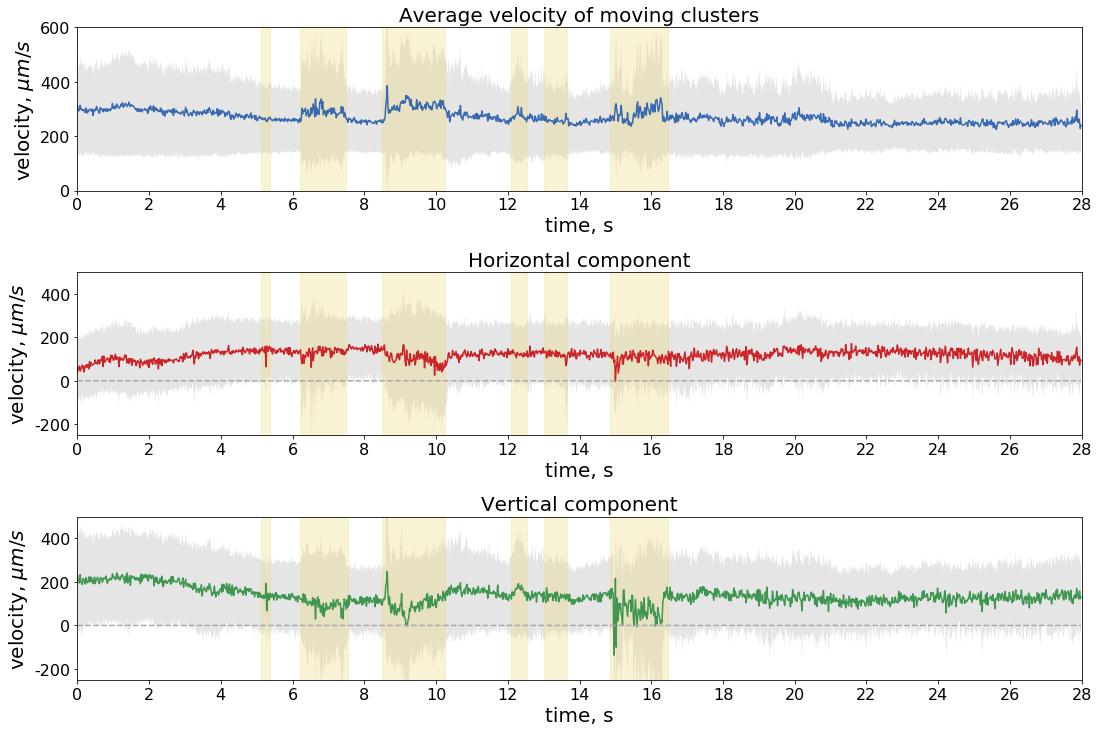

In [81]:

smooth_mask = 2

#fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

#ax0 = plt.subplot(3,1,1)

alpha_value = 0.3

fig, ((ax0, ax1, ax2)) = plt.subplots(3, 1)

fig.set_size_inches(18, 12, forward=True)
#plt.subplots_adjust(bottom=0.15, top=0.9, wspace=0.275, hspace=0.6, left=0.045, right=0.989)
plt.subplots_adjust(hspace=0.5)

#--------------------------------------------------
# Part 1
#--------------------------------------------------

s_avg = smooth(np.array(data_mean_vel), smooth_mask, 'flat') * vel_factor
s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat') * vel_factor  
#ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data
ax0.plot(s_avg, color=blue, linewidth=1.5)
#ax0.plot(np.zeros(len(s_avg)), color='g', linestyle='--')
ax0.fill_between(np.arange(0.0,len(data_mean_vel), 1.0), s_avg+s_std, s_avg-s_std, facecolor='grey', alpha=0.2)
ax0.set_title('Average velocity of moving clusters', size=title_font_size)
#ax0.set_ylim(0, 3.0)
#        ax0.set_xlim(0, 1400)
#        ax0.set_xticks(range(0,1401,50))
#ax0.legend(loc='upper right', shadow=False, fontsize = 'medium')
x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax0.set_xlim(0, 1400)
ax0.set_xticks(np.arange(0,1401,100))
ax0.set_xticklabels(x_lables)
ax0.set_xlabel('time, s', size=label_font_size)

#y_lables = ['{:.1f}'.format(x) for x in np.arange(0, 7, 1) * vel_factor]
y_lables = ['{:.0f}'.format(x) for x in np.arange(0, 4) * 200]
#ax0.set_yticks(np.arange(0, 200001, 50000))
ax0.set_ylim(0, 600)
ax0.set_yticklabels(y_lables)
ax0.set_ylabel('velocity, $\mu m/s$', size=label_font_size)

ax0.axvspan(256, 269, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(310, 375, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(425, 512, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(605, 627, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(650, 682, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(743, 823, facecolor=gold, edgecolor=gold, alpha=alpha_value)

print('Mean velocity:', np.mean(data_mean_vel)*vel_factor)
print('Std velocity:', np.std(data_mean_vel)*vel_factor)



#--------------------------------------------------
# Part 2
#--------------------------------------------------

#plt.xticks(range(0,1400,50))

#ax1 = plt.subplot(3,1,2)

s_avg_x = smooth(np.array(data_mean_x), smooth_mask, 'flat')* vel_factor
s_std_x = smooth(np.array(data_std_x), smooth_mask, 'flat')* vel_factor    
#ax1.plot(np.array(data_mean_x), color='#d3d3d3') # Original data
ax1.plot(s_avg_x, color=red, linewidth=1.5)
ax1.plot(np.zeros(len(s_avg)), color=darkgrey, linestyle='--')
ax1.fill_between(np.arange(0.0,len(data_mean_x), 1.0), s_avg_x+s_std_x, s_avg_x-s_std_x, facecolor='grey', alpha=0.2)
ax1.set_title('Horizontal component', size=title_font_size)
#ax1.set_ylim(0, 3.0)
ax1.set_xlim(0, 1400)
ax1.set_xticks(range(0,1401,50))
#ax1.legend(loc='upper right', shadow=False, fontsize = 'medium')
x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax1.set_xticks(np.arange(0,1401,100))
ax1.set_xticklabels(x_lables)
ax1.set_xlabel('time, s', size=label_font_size)

y_lables = ['{:.0f}'.format(x) for x in np.arange(-1, 3) * 200]
ax1.set_ylim(-250, 500)
ax1.set_yticks(np.arange(-1, 3)* 200)
ax1.set_yticklabels(y_lables)
ax1.set_ylabel('velocity, $\mu m/s$', size=label_font_size)

ax1.axvspan(256, 269, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax1.axvspan(310, 375, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax1.axvspan(425, 512, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax1.axvspan(605, 627, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax1.axvspan(650, 682, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax1.axvspan(743, 823, facecolor=gold, edgecolor=gold, alpha=alpha_value)

#--------------------------------------------------
# Part 3
#--------------------------------------------------


#ax2 = plt.subplot(3,1,3)
s_avg_y = smooth(np.array(data_mean_y), smooth_mask, 'flat')* vel_factor
s_std_y = smooth(np.array(data_std_y), smooth_mask, 'flat') * vel_factor   
#ax1.plot(np.array(data_mean_x), color='#d3d3d3') # Original data
ax2.plot(s_avg_y, color=green, linewidth=1.5)
ax2.plot(np.zeros(len(s_avg)), color=darkgrey, linestyle='--')
ax2.fill_between(np.arange(0.0,len(data_mean_y), 1.0), s_avg_y+s_std_y, s_avg_y-s_std_y, facecolor='grey', alpha=0.2)
ax2.set_title('Vertical component', size=title_font_size)
#ax1.set_ylim(0, 3.0)
ax2.set_xlim(0, 1400)
ax2.set_xticks(range(0,1401,50))
#ax2.legend(loc='upper right', shadow=False, fontsize = 'medium')
x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax2.set_xticks(np.arange(0,1401,100))
ax2.set_xticklabels(x_lables)
ax2.set_xlabel('time, s', size=label_font_size)

y_lables = ['{:.0f}'.format(x) for x in np.arange(-1, 3) * 200]
ax2.set_ylim(-250, 500)
ax2.set_yticks(np.arange(-1, 3)*200)
ax2.set_yticklabels(y_lables)
ax2.set_ylabel('velocity, $\mu m/s$', size=label_font_size)

ax2.axvspan(256, 269, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax2.axvspan(310, 377, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax2.axvspan(425, 512, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax2.axvspan(605, 627, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax2.axvspan(650, 682, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax2.axvspan(743, 823, facecolor=gold, edgecolor=gold, alpha=alpha_value)

plt.savefig(resultsPath + 'fig4_average_velocity.png')


#plt.show()

#ax2.plot(smooth(data[:,indexY], smooth_mask, 'flat'), 'b')
#ax2.set_ylim(0, 1.8)
#ax2.set_title('y-component')

## Figure 5: Cluster size vs cluster velocity using series of plots

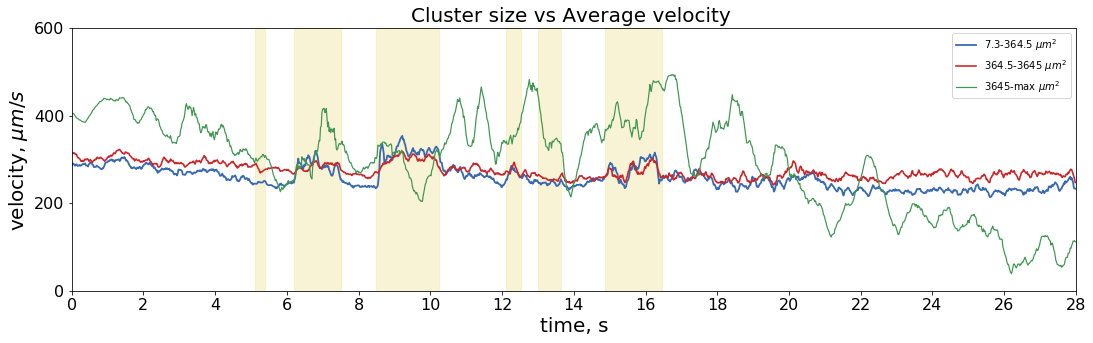

In [77]:
smooth_mask = 6

alpha_value = 0.3

fig, ((ax0)) = plt.subplots(1, 1)

fig.set_size_inches(18, 5, forward=True)
#plt.subplots_adjust(bottom=0.15, top=0.9, wspace=0.275, hspace=0.6, left=0.045, right=0.989)
plt.subplots_adjust(bottom=0.15, hspace=0.5)

#-----------------------------------
# Method 1: Hard categories
#-----------------------------------


# Distribution velocity (cumulative)
data = data_size_vs_vel_dist.T
# Distribution angles (cumulative)
#data = data_size_vs_angle.T

r1 = smooth(np.array(data[0]), smooth_mask, 'flat')*vel_factor
r2 = smooth(np.array(data[1]), smooth_mask, 'flat')*vel_factor
r3 = smooth(np.array(data[2]), smooth_mask, 'flat')*vel_factor       
r4 = smooth(np.array(data[3]), smooth_mask, 'flat')*vel_factor

smooth_mask = 20

r5 = smooth(np.array(data[4]), smooth_mask, 'flat')*vel_factor
r6 = smooth(np.array(data[5]), smooth_mask, 'flat')*vel_factor
r7 = smooth(np.array(data[6]), smooth_mask, 'flat')*vel_factor

#s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat')   
#ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data

#print cm.jet()

ax0.plot((r1+r2) / 2.0, color=blue, linewidth=1.8, label='7.3-364.5 $\mu m^2$')

ax0.plot((r3+r4) / 2.0, color=red, linewidth=1.6, label='364.5-3645 $\mu m^2$')
#ax0.plot(r4, color=cm.jet(255/8*4), linewidth=1.0, label='100-500') 
#ax0.plot(r5, color=cm.jet(255/8*5), linewidth=1.2, label='500-2000')
#ax0.plot(r6, color=cm.jet(255/8*6), linewidth=1.4, label='<4000')
# ax0.plot(r7, color=cm.jet(255/8*7), linewidth=1.5, label='1-max')

ax0.plot((r5+r6+r7) / 3.0, color=green, linewidth=1.2, label='3645-max $\mu m^2$')

ax0.set_title('Cluster size vs Average velocity ', size=title_font_size)
#ax0.set_ylim(1.0, 3.0)
#ax0.set_xticks(range(0,1401,50))
#ax0.set_yticks(np.arange(1.0,3.1,0.2))

x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax0.set_xlim(0, 1400)
ax0.set_xticks(np.arange(0,1401,100))
ax0.set_xticklabels(x_lables)
ax0.set_xlabel('time, s', size=label_font_size)

y_lables = ['{:.0f}'.format(x) for x in np.arange(0, 4, 1) *200]
#ax0.set_ylim(0, 900)
ax0.set_yticks(np.arange(0, 4, 1)*200)
ax0.set_yticklabels(y_lables)
ax0.set_ylabel('velocity, $\mu m / s$', size=label_font_size)

ax0.axvspan(256, 269, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(310, 375, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(425, 512, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(605, 627, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(650, 682, facecolor=gold, edgecolor=gold, alpha=alpha_value)
ax0.axvspan(743, 823, facecolor=gold, edgecolor=gold, alpha=alpha_value)

ax0.legend(loc='upper right', shadow=False, fontsize = 'medium')


plt.savefig(resultsPath + 'fig5_cluster_size_velocity.png')
        

## Figure 6: Direction distribution

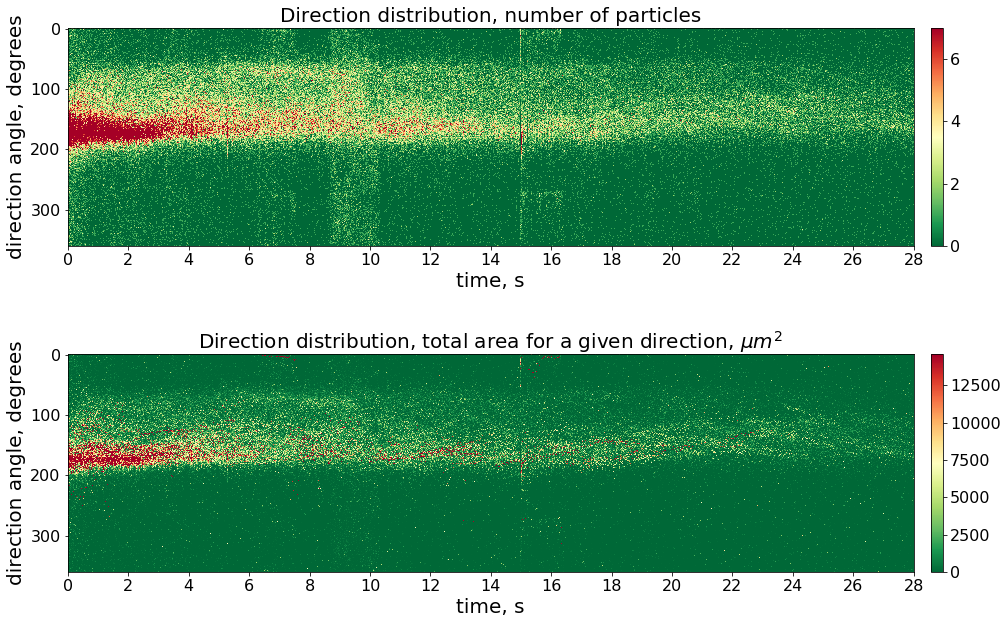

In [5]:
alpha_value = 0.3
        
fig, ((ax0, ax2)) = plt.subplots(2, 1)

fig.set_size_inches(18, 10, forward=True)
#plt.subplots_adjust(bottom=0.15, top=0.9, wspace=0.275, hspace=0.6, left=0.045, right=0.989)
plt.subplots_adjust(hspace=0.5)


cax0 = ax0.imshow(data_hist.T, cmap="RdYlGn_r", interpolation='none')
#ax1.plot(np.ones(1400)*180, np.arange(180), 'b')
ax0.set_title("Direction distribution, number of particles", size=title_font_size)

x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax0.set_xticks(np.arange(0,1401,100))
ax0.set_xticklabels(x_lables)
ax0.set_xlabel('time, s', size=label_font_size)

ax0.set_ylabel('direction angle, degrees', size=label_font_size)

axins0 = inset_axes(ax0,
           width="1.5%",  # width = 10% of parent_bbox width
           height="100%",  # height : 50%
           loc=3,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax0.transAxes,
           borderpad=0,
           )

plt.colorbar(cax0, cax=axins0)
#axins1.xaxis.set_ticks_position("bottom")



cax2 = ax2.imshow(data_area_hist.T*2.7*2.7, cmap="RdYlGn_r", interpolation='none')
#ax1.plot(np.ones(1400)*180, np.arange(180), 'b')
ax2.set_title("Direction distribution, total area for a given direction, $\mu m^2$", size=title_font_size)

x_lables = ['{:.0f}'.format(x) for x in np.arange(0, 1401, 100) *0.02]
ax2.set_xticks(np.arange(0,1401,100))
ax2.set_xticklabels(x_lables)
ax2.set_xlabel('time, s', size=label_font_size)

ax2.set_ylabel('direction angle, degrees', size=label_font_size)

axins2 = inset_axes(ax2,
           width="1.5%",  # width = 10% of parent_bbox width
           height="100%",  # height : 50%
           loc=3,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax2.transAxes,
           borderpad=0,
           )

plt.colorbar(cax2, cax=axins2)

plt.savefig(resultsPath + 'fig6_direction_dist.png')

## Old, Unused plots

In [ ]:
 # Distribution 2 - Cluster size vs cluster velocity
if False:
    plt.figure()

    ax1 = plt.subplot(2,1,1)
    plt.imshow(data_size_vs_vel_dist.T[:-1], cmap="RdYlGn_r", interpolation='none')
    #ax1.plot(np.ones(1400)*180, np.arange(180), 'b')
    plt.title("Cluster size vs cluster velocity")
    plt.xlabel('time frames')
    plt.ylabel('cluster size')
    #plt.xticks(range(0,1400,100))
    #plt.yticks(range(0,360,30))
    plt.colorbar()
    plt.grid(False)

# Distribution 2 -Cluster size vs cluster velocity using series of plots
if False:
    smooth_mask = 6

    #fig, (ax0, ax1) = plt.subplots(nrows=2)
    plt.figure(figsize=(24,5))



    #-----------------------------------
    # Method 1: Hard categories
    #-----------------------------------
    ax0 = plt.subplot(3,1,1)

    # Distribution velocity (cumulative)
    data = data_size_vs_vel_dist.T
    # Distribution angles (cumulative)
    #data = data_size_vs_angle.T


    print(len(data[0]))

    #for t in data_size_vs_vel_dist.T:

    #print t

    r1 = smooth(np.array(data[0]), smooth_mask, 'flat')
    r2 = smooth(np.array(data[1]), smooth_mask, 'flat')
    r3 = smooth(np.array(data[2]), smooth_mask, 'flat')       
    r4 = smooth(np.array(data[3]), smooth_mask, 'flat')

    r5 = smooth(np.array(data[4]), smooth_mask, 'flat')
    r6 = smooth(np.array(data[5]), smooth_mask, 'flat')
    r7 = smooth(np.array(data[6]), smooth_mask, 'flat')

    #s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat')   
    #ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data

    #print cm.jet()

    ax0.plot(r1, color=cm.jet(255/8*1), linewidth=0.3, label='1-20')
    ax0.plot(r2, color=cm.jet(255/8*2), linewidth=0.5, label='20-50')
    ax0.plot(r3, color=cm.jet(255/8*3), linewidth=0.7, label='50-100')
    ax0.plot(r4, color=cm.jet(255/8*4), linewidth=1.0, label='100-500') 
    #ax0.plot(r5, color=cm.jet(255/8*5), linewidth=1.2, label='500-2000')
    #ax0.plot(r6, color=cm.jet(255/8*6), linewidth=1.4, label='<4000')
   # ax0.plot(r7, color=cm.jet(255/8*7), linewidth=1.5, label='1-max')

    ax0.plot((r5+r6+r7) / 3.0, color=cm.jet(255/8*7), linewidth=1.4, label='500-max')

    ax0.set_title('Cluster size vs Average velocity (Strict categories)')
    #ax0.set_ylim(1.0, 3.0)
    ax0.set_xticks(range(0,1401,50))
    #ax0.set_yticks(np.arange(1.0,3.1,0.2))

    ax0.legend(loc='upper right', shadow=False, fontsize = 'medium')
    plt.xlabel('time frames')
    plt.ylabel('average velocity')


    #-----------------------------------
    # Method 2: Cumulative
    #-----------------------------------

    ax1 = plt.subplot(3,1,2)

    # Distribution velocity (cumulative)
    data = data_size_vs_vel_dist2.T
    # Distribution angles (cumulative)
    #data = data_size_vs_angle.T


    print(len(data[0]))

    #for t in data_size_vs_vel_dist.T:

    #print t

    r1 = smooth(np.array(data[0]), smooth_mask, 'flat')
    r2 = smooth(np.array(data[1]), smooth_mask, 'flat')
    r3 = smooth(np.array(data[2]), smooth_mask, 'flat')       
    r4 = smooth(np.array(data[3]), smooth_mask, 'flat')

    r5 = smooth(np.array(data[4]), smooth_mask, 'flat')
    r6 = smooth(np.array(data[5]), smooth_mask, 'flat')
    r7 = smooth(np.array(data[6]), smooth_mask, 'flat')

    #s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat')   
    #ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data

    #print cm.jet()

    ax1.plot(r1, color=cm.jet(255/8*1), linewidth=0.3, label='1-20')
    ax1.plot(r2, color=cm.jet(255/8*2), linewidth=0.5, label='<50')
    ax1.plot(r3, color=cm.jet(255/8*3), linewidth=0.7, label='<100')
    ax1.plot(r4, color=cm.jet(255/8*4), linewidth=1.0, label='<500') 
    ax1.plot(r5, color=cm.jet(255/8*5), linewidth=1.2, label='<2000')
    ax1.plot(r6, color=cm.jet(255/8*6), linewidth=1.4, label='<4000')
    ax1.plot(r7, color=cm.jet(255/8*7), linewidth=1.5, label='1-max')

    #ax0.plot((r6+r7) / 2.0, color=cm.jet(255/8*6), linewidth=1.4, label='<1-2000-4000')

    ax1.set_title('Cluster size vs Average velocity (Cumulative approach)')
    #ax0.set_ylim(1.0, 3.0)
    ax1.set_xticks(range(0,1401,50))
    #ax0.set_yticks(np.arange(1.0,3.1,0.2))

    ax1.legend(loc='upper right', shadow=False, fontsize = 'medium')
    plt.xlabel('time frames')
    plt.ylabel('average velocity')


     #-----------------------------------
    # Method 3: Local neigbours ranges
    #-----------------------------------

    ax2 = plt.subplot(3,1,3)

    # Distribution velocity (cumulative)
    data = data_size_vs_vel_dist3.T
    # Distribution angles (cumulative)
    #data = data_size_vs_angle.T


    print(len(data[0]))

    #for t in data_size_vs_vel_dist.T:

    #print t

    r1 = smooth(np.array(data[0]), smooth_mask, 'flat')
    r2 = smooth(np.array(data[1]), smooth_mask, 'flat')
    r3 = smooth(np.array(data[2]), smooth_mask, 'flat')       
    r4 = smooth(np.array(data[3]), smooth_mask, 'flat')

    r5 = smooth(np.array(data[4]), smooth_mask, 'flat')
    r6 = smooth(np.array(data[5]), smooth_mask, 'flat')
    r7 = smooth(np.array(data[6]), smooth_mask, 'flat')

    #s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat')   
    #ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data

    #print cm.jet()

    #ax2.plot(r1, color=cm.jet(255/8*1), linewidth=0.3, label='1-20')
    ax2.plot(r2, color=cm.jet(255/8*1), linewidth=0.5, label='1-50')
    ax2.plot(r3, color=cm.jet(255/8*2), linewidth=0.7, label='20-100')
    ax2.plot(r4, color=cm.jet(255/8*3), linewidth=1.0, label='50-500') 
    ax2.plot(r5, color=cm.jet(255/8*4), linewidth=1.2, label='100-2000')
    ax2.plot(r6, color=cm.jet(255/8*7), linewidth=1.4, label='2000-max')
    #ax2.plot(r7, color=cm.jet(255/8*6), linewidth=1.5, label='1-max')

    #ax0.plot((r6+r7) / 2.0, color=cm.jet(255/8*6), linewidth=1.4, label='<1-2000-4000')

    ax2.set_title('Cluster size vs Average velocity (Neigbour ranges)')
    ax2.set_ylim(1.0, 4.0)
    ax2.set_xticks(range(0,1401,50))
    #ax0.set_yticks(np.arange(1.0,3.1,0.2))

    ax2.legend(loc='upper right', shadow=False, fontsize = 'medium')



    plt.xlabel('time frames')
    plt.ylabel('average velocity')


    #plt.show()
    
    
    
    
 # Distribution 3 -Cluster size vs cluster velocity average over time periods
if False:
    smooth_mask = 6

    #fig, (ax0, ax1) = plt.subplots(nrows=2)
    plt.figure(figsize=(24,5))



    #-----------------------------------
    # Method 1: Hard categories
    #-----------------------------------
    ax0 = plt.subplot(2,1,1)

    # Distribution velocity (cumulative)
    data = data_size_vs_vel_dist.T
    # Distribution angles (cumulative)
    #data = data_size_vs_angle.T


    print(len(data[0]))

    #for t in data_size_vs_vel_dist.T:

    #print t

    r1 = smooth(np.array(data[0]), smooth_mask, 'flat')
    r2 = smooth(np.array(data[1]), smooth_mask, 'flat')
    r3 = smooth(np.array(data[2]), smooth_mask, 'flat')       
    r4 = smooth(np.array(data[3]), smooth_mask, 'flat')

    r5 = smooth(np.array(data[4]), smooth_mask, 'flat')
    r6 = smooth(np.array(data[5]), smooth_mask, 'flat')
    r7 = smooth(np.array(data[6]), smooth_mask, 'flat')
    r8 = smooth(np.array(data[7]), smooth_mask, 'flat')

    time_frames = 28
    step = len(data[0]) / time_frames

    clusterSizes = np.zeros([8,time_frames])


    #print np.mean(r1[0*step:(0+1)*step])


    for i in range(0, time_frames):
        clusterSizes[0, i] = np.mean(r1[i*step:(i+1)*step])
        clusterSizes[1, i] = np.mean(r2[i*step:(i+1)*step])
        clusterSizes[2, i] = np.mean(r3[i*step:(i+1)*step])
        clusterSizes[3, i] = np.mean(r4[i*step:(i+1)*step])
        clusterSizes[4, i] = np.mean(r5[i*step:(i+1)*step])
        clusterSizes[5, i] = np.mean(r6[i*step:(i+1)*step])
        clusterSizes[6, i] = np.mean(r7[i*step:(i+1)*step])
        clusterSizes[7, i] = np.mean(r8[i*step:(i+1)*step])

    print(clusterSizes)



    #s_std = smooth(np.array(data_std_vel), smooth_mask, 'flat')   
    #ax0.plot(np.array(data_mean_vel), color='#d3d3d3') # Original data

    #print cm.jet()

    ax0.plot(clusterSizes[0], color=cm.jet(255/8*1), linewidth=0.3, marker='o', markeredgecolor=cm.jet(255/8*1), label='1-20')
    ax0.plot(clusterSizes[1], color=cm.jet(255/8*2), linewidth=0.5, marker='s', markeredgecolor=cm.jet(255/8*2), label='20-50')
    ax0.plot(clusterSizes[2], color=cm.jet(255/8*3), linewidth=0.7, marker='v', markeredgecolor=cm.jet(255/8*3), label='50-100')
    ax0.plot(clusterSizes[3], color=cm.jet(255/8*4), linewidth=1.0, marker='D', markeredgecolor=cm.jet(255/8*4), label='100-500') 
    ax0.plot(clusterSizes[4], color=cm.jet(255/8*5), linewidth=1.2, marker='+', markeredgecolor=cm.jet(255/8*5), label='500-1000')
    ax0.plot(clusterSizes[5], color=cm.jet(255/8*6), linewidth=1.4, marker='*', markeredgecolor=cm.jet(255/8*6), label='1000-2000')
    ax0.plot(clusterSizes[6], color=cm.jet(255/8*7), linewidth=2.0, marker='s', markeredgecolor=cm.jet(255/8*7), label='2000-4000')
    ax0.plot(clusterSizes[7], color=cm.jet(255/8*8), linewidth=2.0, marker='o', markeredgecolor=cm.jet(255/8*8), label='>4000')
   # ax0.plot(r7, color=cm.jet(255/8*7), linewidth=1.5, label='1-max')

    #ax0.plot((r6[0:100]+r7[0:100]) / 2.0, color=cm.jet(255/8*7), linewidth=1.4, label='2000-max')

    ax0.set_title('Cluster size vs Average velocity (averaged over a period of '+ str(step) +' time frames)')
    ax0.set_xlim(0, time_frames-1)        
    ax0.set_ylim(0, 5.0)
    ax0.set_xticks(range(0,time_frames,1))
    ax0.set_yticks(np.arange(0.0,5.1,0.5))

    ax0.legend(loc='upper right', shadow=False, fontsize = 'medium')
    plt.xlabel('time period')
    plt.ylabel('average velocity')


    ax1 = plt.subplot(2,1,2)
    ax1.plot(clusterSizes[0], color=cm.jet(255/8*1), linewidth=0.3, marker='o', markeredgecolor=cm.jet(255/8*1), label='1-20')
    ax1.plot(clusterSizes[1], color=cm.jet(255/8*2), linewidth=0.5, marker='s', markeredgecolor=cm.jet(255/8*2), label='20-50')
    ax1.plot(clusterSizes[2], color=cm.jet(255/8*3), linewidth=0.7, marker='v', markeredgecolor=cm.jet(255/8*3), label='50-100')
    ax1.plot(clusterSizes[3], color=cm.jet(255/8*4), linewidth=1.0, marker='D', markeredgecolor=cm.jet(255/8*4), label='100-500') 
    ax1.plot(clusterSizes[4], color=cm.jet(255/8*5), linewidth=1.2, marker='+', markeredgecolor=cm.jet(255/8*5), label='500-1000')
    ax1.plot(clusterSizes[5], color=cm.jet(255/8*6), linewidth=1.4, marker='*', markeredgecolor=cm.jet(255/8*6), label='1000-2000')
    #ax1.plot(clusterSizes[6], color=cm.jet(255/8*7), linewidth=2.0, marker='s', markeredgecolor=cm.jet(255/8*7), label='2000-4000')
    #ax1.plot(clusterSizes[7], color=cm.jet(255/8*8), linewidth=2.0, marker='o', markeredgecolor=cm.jet(255/8*8), label='>4000')
   # ax0.plot(r7, color=cm.jet(255/8*7), linewidth=1.5, label='1-max')

    #ax0.plot((r6[0:100]+r7[0:100]) / 2.0, color=cm.jet(255/8*7), linewidth=1.4, label='2000-max')

    ax1.set_title('Cluster size vs Average velocity (averaged over a period of '+ str(step) +' time frames)')
    ax1.set_xlim(0, time_frames-1)         
    ax1.set_ylim(1.5, 3.0)
    ax1.set_xticks(range(0,time_frames,1))
    ax1.set_yticks(np.arange(1.5,3.1,0.2))

    ax1.legend(loc='upper right', shadow=False, fontsize = 'medium')
    plt.xlabel('time period')
    plt.ylabel('average velocity')